# CreditOne Classification

In [0]:
# Imports
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Cross Validation
from sklearn.model_selection import train_test_split

In [2]:
#data
path = "/content/drive/My Drive/Data/default of credit card clients.csv"
rawData = pd.read_csv(path, header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [4]:
rawData['SEX']= rawData['SEX'].astype('category')
rawData['SEX']

0        2
1        2
2        2
3        2
4        1
        ..
29995    1
29996    1
29997    1
29998    1
29999    1
Name: SEX, Length: 30000, dtype: category
Categories (2, int64): [1, 2]

In [5]:
rawData['EDUCATION']= rawData['EDUCATION'].astype('category')
rawData['EDUCATION']

0        2
1        2
2        2
3        2
4        2
        ..
29995    3
29996    3
29997    2
29998    3
29999    2
Name: EDUCATION, Length: 30000, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [6]:
rawData['MARRIAGE'] = rawData['MARRIAGE'].astype('category')
rawData['MARRIAGE']

0        1
1        2
2        2
3        1
4        1
        ..
29995    1
29996    2
29997    2
29998    1
29999    1
Name: MARRIAGE, Length: 30000, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [7]:
rawData.iloc[:,6:12] = rawData.iloc[:,6:12].astype('category')
rawData.iloc[:,6:12]

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
...,...,...,...,...,...,...
29995,0,0,0,0,0,0
29996,-1,-1,-1,-1,0,0
29997,4,3,2,-1,0,0
29998,1,-1,0,0,0,-1


In [8]:
rawData.drop(['ID'],axis=1, inplace = True)
rawData['default payment next month'] = rawData['default payment next month'].astype('category')
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int

In [0]:
# Data Preparation
SEX = {'Male' : 1, 
       'Female' : 2}
EDUCATION = {'Graduate School': 1, 
             'University': 2, 
             'High School': 3,
             'Others': 0,
             'Others': 4,
             'Others': 5,
             'Others': 6}
MARRIAGE = {'Married': 1, 
            'Single': 2, 
            'Divorce': 3, 
            'Others': 0}
PAYMENT = {'No consumption': -2, 
          'Paid in full': -1, 
          'The use of revolving credit': 0, 
          'payment delay for one month': 1,
          'payment delay for two months': 2,
          'payment delay for three months': 3,
          'payment delay for four months': 4,
          'payment delay for five months': 5,
          'payment delay for six months': 6,
          'payment delay for seven months': 7,
          'payment delay for eight months': 8,
          'payment delay for nine months and above': 9}


1. Select the features

In [10]:
#features
features = rawData.iloc[:,:22]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


2. Select the Dependent Variable

In [11]:
#dependent variable
depVar = rawData['default payment next month']
depVar

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: category
Categories (2, int64): [0, 1]

3. Establish Data Partition for Testing and Trainning

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar)

In [13]:
X_train.shape, X_test.shape

((22500, 22), (7500, 22))

In [14]:
y_train.shape, y_test.shape

((22500,), (7500,))

## Models

In [0]:
# Models
modelSVR = SVC()
modelRF = RandomForestClassifier()
modelLR = LogisticRegression(max_iter = 300)
modelNB_multi = MultinomialNB (alpha=0.01)

In [16]:
#features
features = rawData.iloc[:,:22]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [17]:
#dependent variable
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: category
Categories (2, int64): [0, 1]


# Choosing the Right Model

1. Random Forest Clasifier Model Fitting and Scoring

In [18]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.81844444 0.81088889 0.81888889 0.81644444 0.80822222]


0.9993333333333333

2. Support Vector Clasifier Model Fitting and Scoring

In [19]:
#Model Fitting
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[0.776      0.77622222 0.77622222 0.77622222 0.77622222]


0.7764

3. Logistic Regression Model Fitting and Scoring

In [20]:
#Model Fitting
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[0.776      0.776      0.776      0.77622222 0.77622222]


0.7761777777777777

#Making Predictions

In [21]:
#Make Predictions
predictions1 = modelRF.predict(X_test)
score = modelRF.score(X_test, y_test)
print(score)

0.8182666666666667


In [22]:
#Make Predictions
predictions2 = modelSVR.predict(X_test)
score = modelSVR.score(X_test, y_test)
print(score)

0.7866666666666666


In [23]:
#Make Predictions
predictions3 = modelLR.predict(X_test)
score = modelLR.score(X_test, y_test)
print(score)

0.7866666666666666


 Plotting the Results

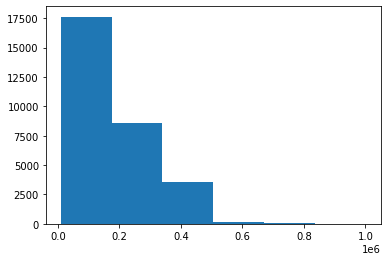

In [24]:
plt.hist(rawData['LIMIT_BAL'], bins=6)
plt.show()

Text(0.5, 1.0, "Distribution of clients' Ages")

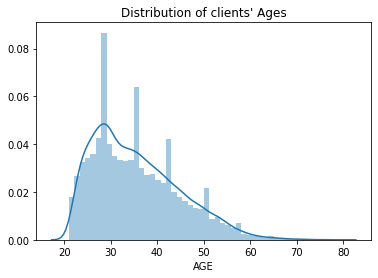

In [25]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(rawData['AGE'])
age_dist.set_title("Distribution of clients' Ages")

In [26]:
header = rawData.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [0]:
TestData = rawData
#TestData['default payment next month'] = predictions3

In [0]:
# Data Preparation
TestData['SEX'] = TestData['SEX'].replace(1, "Male")
TestData['SEX'] = TestData['SEX'].replace(2, "Female")

In [0]:
TestData['default payment next month'] = TestData['default payment next month'].replace(0, "Not Default")
TestData['default payment next month'] = TestData['default payment next month'].replace(1, "Default")

In [0]:
TestData['MARRIAGE'] = TestData['MARRIAGE'].replace(1, "Married")
TestData['MARRIAGE'] = TestData['MARRIAGE'].replace(2, "Single")
TestData['MARRIAGE'] = TestData['MARRIAGE'].replace(3, "Divorce")
TestData['MARRIAGE'] = TestData['MARRIAGE'].replace(0, "Others")

In [0]:
TestData['EDUCATION'] = TestData['EDUCATION'].replace(1, "Graduate School")
TestData['EDUCATION'] = TestData['EDUCATION'].replace(2, "University")
TestData['EDUCATION'] = TestData['EDUCATION'].replace(3, "High School")
TestData['EDUCATION'] = TestData['EDUCATION'].replace([4,5,6,0], "Others")

In [0]:
TestData.iloc[:,6:12] = TestData.iloc[:,6:12].replace(-2, "No consumption")
TestData.iloc[:,6:12] = TestData.iloc[:,6:12].replace(-1, "Paid in full")
TestData.iloc[:,6:12] = TestData.iloc[:,6:12].replace(0, "The use of revolving credit")
TestData.iloc[:,6:12] = TestData.iloc[:,6:12].replace(1, "payment delay for one month")
TestData.iloc[:,6:12] = TestData.iloc[:,6:12].replace(2, "payment delay for two months")
TestData.iloc[:,6:12] = TestData.iloc[:,6:12].replace(3, "payment delay for three months")
TestData.iloc[:,6:12] = TestData.iloc[:,6:12].replace(4, "payment delay for four months")
TestData.iloc[:,6:12] = TestData.iloc[:,6:12].replace(5, "payment delay for five months")
TestData.iloc[:,6:12] = TestData.iloc[:,6:12].replace(6, "payment delay for six months")
TestData.iloc[:,6:12] = TestData.iloc[:,6:12].replace(7, "payment delay for seven months")
TestData.iloc[:,6:12] = TestData.iloc[:,6:12].replace(8, "payment delay for eight months")
TestData.iloc[:,6:12] = TestData.iloc[:,6:12].replace(9, "payment delay for nine months and above")

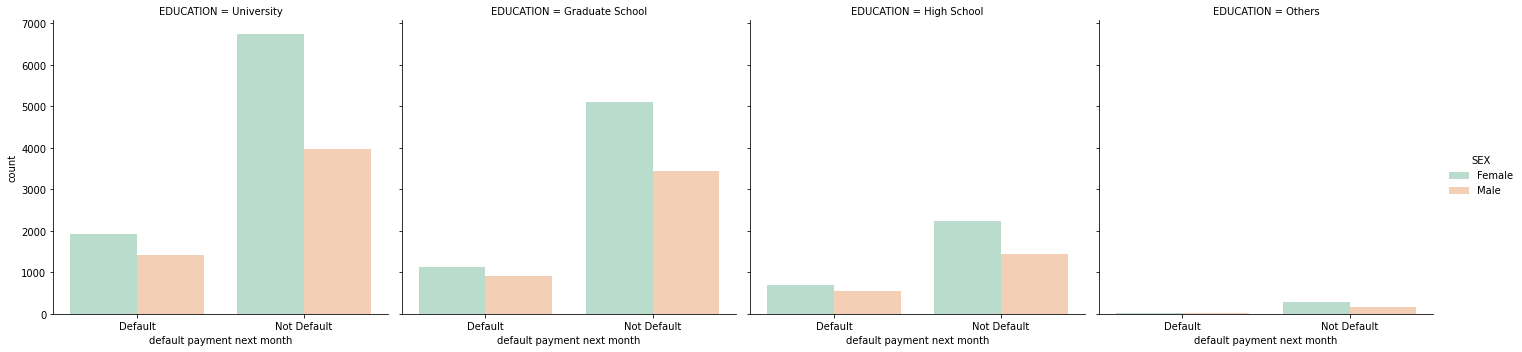

In [61]:
sns.catplot ('default payment next month', 
             data=rawData, 
             hue='SEX', 
             kind='count', 
             palette='Pastel2', 
             col='EDUCATION')

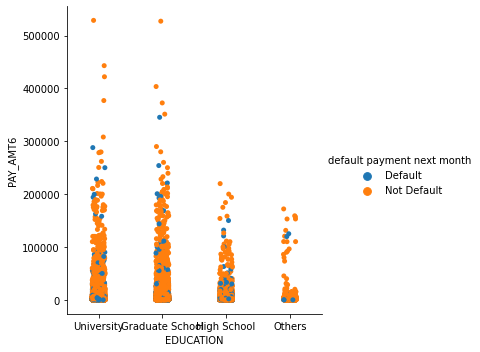

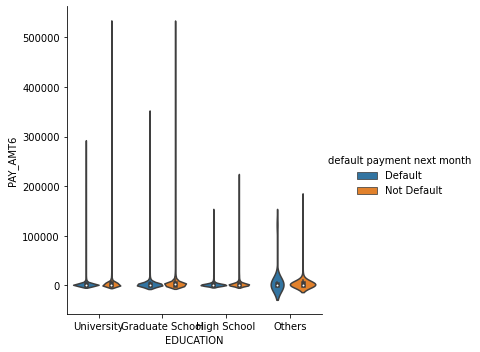

In [57]:
f = sns.catplot(x="EDUCATION", y="PAY_AMT6", hue="default payment next month", data=TestData)
f = sns.catplot(x="EDUCATION", y="PAY_AMT6", hue="default payment next month", data=TestData, kind="violin")

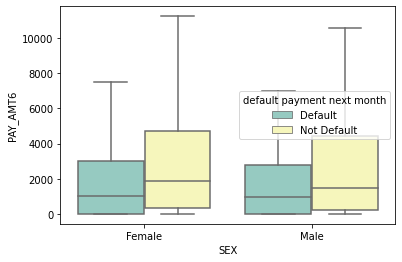

In [99]:
ax = sns.boxplot(x="SEX", y="PAY_AMT6", hue="default payment next month",
                 data=TestData, palette="Set3", sym ="")

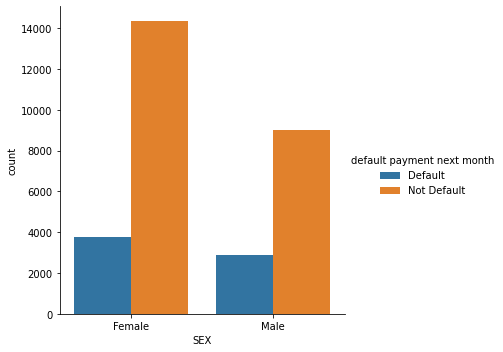

In [88]:
h = sns.catplot(x="SEX",  hue="default payment next month", data=TestData, kind='count')

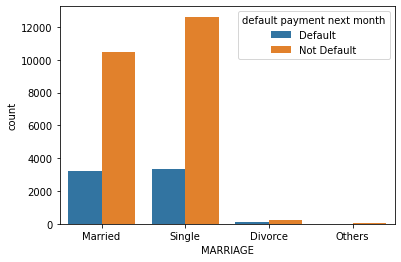

In [86]:
ax = sns.countplot(x="MARRIAGE", hue="default payment next month", data=TestData)

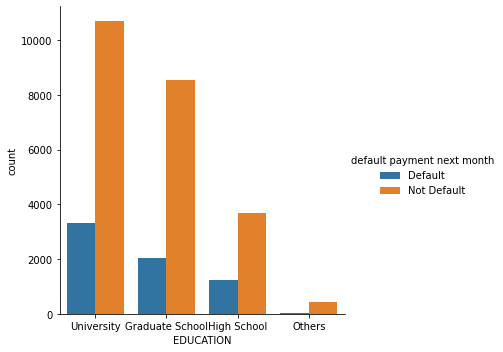

In [68]:
h = sns.catplot(x="EDUCATION",  hue="default payment next month", data=TestData, kind='count')

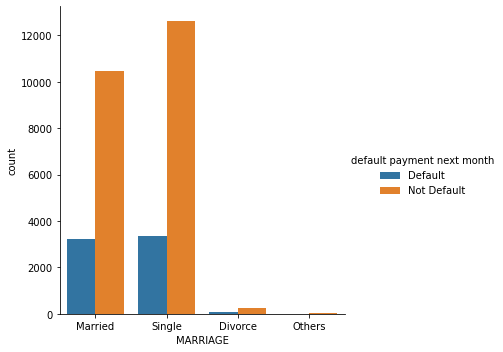

In [100]:
h = sns.catplot(x="MARRIAGE",  hue="default payment next month", data=TestData, kind='count')